# Proyecto integrador 1
## Proyecto de analisis de imagenes
## Integrantes:

   - Juliana Ochoa Ramirez
   - Javier Arturo Rozo Alzate
   - Mateo Graciano
   - Cristian David Muñoz Mora
   - Juan Mauricio Cuscagua López
    
## Entendimiento del problema

- **Determinar los objetivos**: Construir un aplicativo que permita reconocer si el rostro humano de una imagen se encuentra dentro de la muestra de individuos que ya se conocen. Lo anterior, se realiza a través de las características de la cara misma y que tan cercano se encuentra con una imagen del set que se conoce y así poder clasificar si pertenece o no.

Identificación de caras: ¿quién soy? (test de uno a muchos)/
verificación o autentificaci+on de caras ¿soy quien digo ser? (test de uno a uno)/ 
test de lista (¿me estás buscando?),


- **Evaluación de la situación**: ¿cuál es el conocimiento previo disponible acerca del problema?, ¿se cuenta con la cantidad de datos requerida para resolver el problema?, ¿cuál es la relación coste beneficio de la aplicación de DM?

- **Que solución pretende dar el proyecto**

## Entendimiento del problema

- **Determinar los objetivos**: Construir un aplicativo que permita reconocer si un rostro humano es un registro raro o pertenece a una de las siguientes categorias xx,yy,zz,ww. Lo anterior, se realiza a través de las características de la cara de la foto y que tan cercano se encuentra con una imagen del set que se conoce para poder clasificar si pertenece o no a la muestra como primer paso.


- **Evaluación de la situación**: ¿cuál es el conocimiento previo disponible acerca del problema?, ¿se cuenta con la cantidad de datos requerida para resolver el problema?, ¿cuál es la relación coste beneficio de la aplicación de DM?

- **Que solución pretende dar el proyecto**
Identificación de caras: ¿quién soy? (test de uno a muchos)/  yo digo que damos esta solución...... 
verificación o autentificaci+on de caras ¿soy quien digo ser? (test de uno a uno)/ 
test de lista (¿me estás buscando?),

## Entendimiento de los datos

explicar maso como es la forma en la que los vamos a almacenar y que son en escala de grises y todos eso

identificar su calidad y establecer las relaciones más evidentes que permitan definir las primeras hipótesis

- **Recolección de datos iniciales**: Esta tarea tiene como objetivo, elaborar informes con una lista de los datos adquiridos, su localización, las técnicas utilizadas en su recolección y los problemas y soluciones inherentes a este proceso

- **Descripción de los datos**:(número de registros y campos por registro), su identificación, el significado de cada campo y la descripción del formato inicial.

- **Exploración de datos**:  La salida de esta tarea es un informe de exploración de los datos, aplicación de pruebas estadísticas básicas, que revelen propiedades de los datos adquiridos.

- **Verificación de la calidad de los datos**: La idea en este punto, es asegurar la completitud y corrección de los datos.

## Preparacón de los datos
Selección de datos que subconjunto de los datos vamos a dejar.

- **Limpieza de los datos**:  tecnicas 'normalización de los datos, discretización de campos numéricos, tratamiento de valores ausentes, reducción del volumen de datos, etc

- **Estructuración de los datos**: Esta tarea incluye las operaciones de preparación de los datos tales como la generación de nuevos atributos a partir de atributos ya existentes, integración de nuevos registros o transformación de valores para atributos existentes

- **Integración de los datos**:  generación de nuevos campos a partir de otros existentes, creación de nuevos registros, fusión de tablas campos o nuevas tablas donde se resumen características de múltiples registros o de otros campos en nuevas tablas de resumen.

- **Formateo de los datos**: reordenación de los campos y/o registros de la tabla o el ajuste de los valores de los campos a las limitaciones de las herramientas de modelación. Cambio de 180,200 a 10, 180.


Imagenes de rostros, los outliers debe sacar lo raro como gatos, paisajes, entre otros.  Grises, dimension de 180x180.  revisar para eigen faces y las demás metodologias que necesitamos. 

Creo que estas cosas de arriba se debenintegrar a los chunks de abajo - comparto y podemos empezar a completar con lo que hemos hecho pero debemos pensar mas en el proyecto final y en que hariamos.


## Librerias usadas en el proyecto y funciones creadas utiles

In [1]:
import cv2 # Lee las imagenes jpg
import re
import random # Crea Numeros aleatores
import pandas as pd
import numpy as np
from scipy.spatial.distance import directed_hausdorff
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from skimage.measure import  compare_ssim
from collections import Counter

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['faces','outliers']#classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


# Lectura y preprocesamiento de datos

In [2]:
#List all image files
import glob
image_list = []
base1='input/faces94/*'
male=[]
female=[]
n_im=0
for root1 in glob.glob(base1):
    base2=root1+'/*'
    for (root2) in glob.glob(base2):
        base3=root2+'/*.jpg'
        for (root3) in glob.glob(base3):
            image_list.append(root3)
            if('/male/'in root3):
                male.append(n_im)
            if('/female/'in root3):
                female.append(n_im)
            if('/malestaff/'in root3):
                male.append(n_im)
            n_im+=1

# Make a whole matrix with all dataset 180x180*num_images
data_set=np.zeros((len(image_list),180,180))
for image in range(len(image_list)):
    data_set[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(image_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)

outlier_list = []
base1='input/Outliers/*'
for root1 in glob.glob(base1):
    outlier_list.append(root1)
    
data_set_out=np.zeros((len(outlier_list),180,180))
for image in range(len(outlier_list)):
    data_set_out[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(outlier_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)


# Exploración de datos

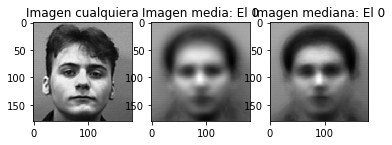

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(data_set[2500,:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen cualquiera')
#plt.show()

mean_face=np.mean(data_set, axis=0)
axs[1].imshow(mean_face ,cmap = plt.cm.gray) #check
axs[1].set_title('Imagen media: El 0')

median_face=np.median(data_set, axis=0)
axs[2].imshow(median_face ,cmap = plt.cm.gray) #check
axs[2].set_title('Imagen mediana: El 0')

plt.show()



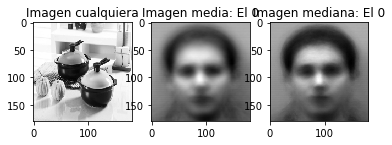

In [4]:

data_set_aum=np.append(data_set,data_set_out,axis=0)

fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(data_set_aum[-1,:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen cualquiera')
#plt.show()

mean_face=np.mean(data_set_aum, axis=0)
axs[1].imshow(mean_face ,cmap = plt.cm.gray) #check
axs[1].set_title('Imagen media: El 0')

median_face=np.median(data_set_aum, axis=0)
axs[2].imshow(median_face ,cmap = plt.cm.gray) #check
axs[2].set_title('Imagen mediana: El 0')

plt.show()

# Distancias sobre imagenes
## Metrica Euclidiana
### Distribución de las normas


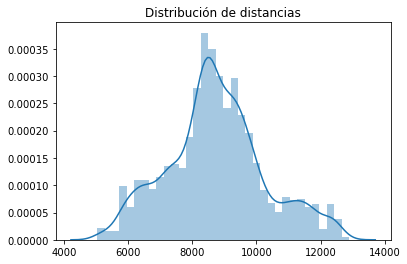

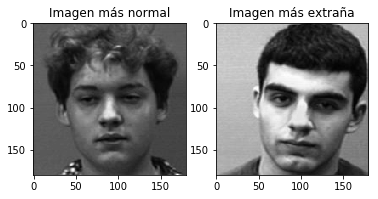

In [5]:
cero=np.mean(data_set, axis=0)
distances=np.linalg.norm(data_set-cero, ord=None, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show();

### Se identifican los outliers?

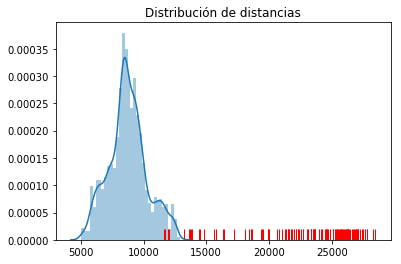

Normalized confusion matrix


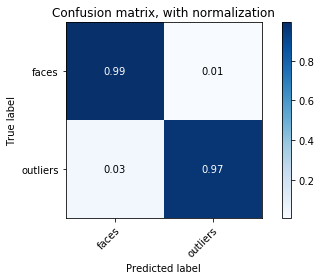

In [6]:

distances_out=np.linalg.norm(data_set_out-cero, ord=None, axis=(1,2), keepdims=False)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show();

distances=np.concatenate((distances,distances_out))

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')

### Se identifican los outliers si los incluimos en desde el comiezo?

In [7]:
cero=np.mean(data_set_aum, axis=0)
distances=np.linalg.norm(data_set_aum-cero, ord=None, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show();

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show();



LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( ((distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')


SyntaxError: invalid syntax (<ipython-input-7-18d879959bf5>, line 26)

## Metrica de Manhattan

### Distribución de las normas

In [ ]:
cero=np.mean(data_set, axis=0)
distances=np.linalg.norm(data_set-cero, ord=1, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

### Se identifican los outliers?

In [ ]:

distances_out=np.linalg.norm(data_set_out-cero, ord=1, axis=(1,2), keepdims=False)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show()

distances=np.concatenate((distances,distances_out))

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')

### Se identifican los outliers si los incluimos en desde el comiezo?

In [ ]:
cero=np.mean(data_set_aum, axis=0)
distances=np.linalg.norm(data_set_aum-cero, ord=1, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')


## Chessboard

### Distribución de las normas

In [ ]:
cero=np.mean(data_set, axis=0)
distances=np.linalg.norm(data_set-cero, ord=np.inf, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

### Se identifican los outliers?

In [ ]:
distances_out=np.linalg.norm(data_set_out-cero, ord=np.inf, axis=(1,2), keepdims=False)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show()

distances=np.concatenate((distances,distances_out))

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere(  (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')


### Se identifican los outliers si los incluimos en desde el comiezo?

In [ ]:
cero=np.mean(data_set_aum, axis=0)
distances=np.linalg.norm(data_set_aum-cero, ord=np.inf, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()



LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')

## SSIM
### Distribución de las normas

In [ ]:
cero=np.mean(data_set, axis=0)
distances=[]
for image in range(data_set.shape[0]):
    #print(image)
    #distances.append(directed_hausdorff(cero,data_set[image,:,:])[0])
    sim=compare_ssim(cero,data_set[image,:,:])
    dis=1-sim
    distances.append(dis)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

### Se identifican los outliers?

In [ ]:

distances_out=[]
for image in range(data_set_out.shape[0]):
    #print(image)
    sim=compare_ssim(cero,data_set_out[image,:,:])
    dis=1-sim
    distances_out.append(dis)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show()

distances=np.concatenate((distances,distances_out))

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere(  (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')



### Se identifican los outliers si los incluimos en desde el comiezo?

In [ ]:
cero=np.mean(data_set_aum, axis=0)
distances=[]
for image in range(data_set_aum.shape[0]):
    #print(image)
    sim=compare_ssim(cero,data_set_aum[image,:,:])
    dis=1-sim
    distances.append(dis)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere(  (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')